In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv"

In [2]:
df = pd.read_csv(filename)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
#How could Highway-mpg help us predict car price?
X= df[['highway-mpg']]
Y=df['price']
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
#used to make predictions
Yhat= lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [8]:
#slope
lm.coef_

array([-821.73337832])

In [9]:
#intercept
lm.intercept_

38423.305858157386

In [ ]:
#final estimated model
#price = 38423.3-(821.7*highway-mpg)

In [14]:
lm1 = LinearRegression()
Z = df[['horsepower','curb-weight','engine-size','highway-mpg']]
Y = df['price']
lm1.fit(Z,Y)
lm1.intercept_

-15806.624626329205

In [12]:
Yhat1 = lm1.predict(Z)
Yhat1[0:5]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211])

In [15]:
lm1.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [16]:
import seaborn as sns
%matplotlib inline

(0, 48163.78107235583)

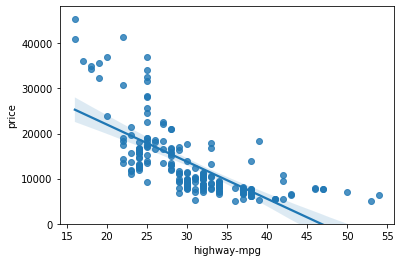

In [18]:
sns.regplot(df['highway-mpg'],df['price'])
plt.ylim(0,)

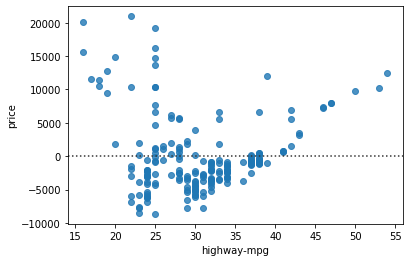

In [19]:
sns.residplot(df['highway-mpg'],df['price'])

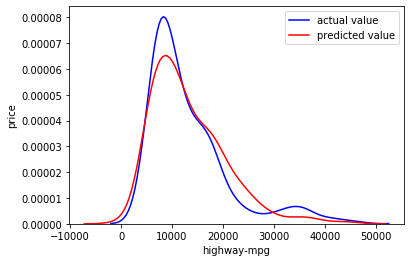

In [23]:
sns.distplot(df['price'], hist=False, color="blue", label="actual value")
sns.distplot(Yhat1, hist=False, color="red", label="predicted value")
plt.xlabel('highway-mpg')
plt.ylabel('price')
plt.show()

In [37]:
def plotPolly(model, independent_variable, dependent_variable, name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)
    
    plt.title("Polynomial Fit with Matplotlib for Price ~ Length")
    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.xlabel(name)
    
    plt.ylabel('price of cars')
    plt.ylim(0,)
    plt.show()

In [38]:
x = df['highway-mpg']
y = df['price']
f = np.polyfit(x,y,3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


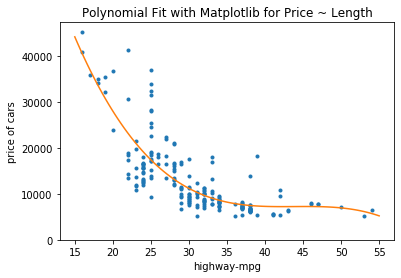

In [39]:
plotPolly(p, x, y, 'highway-mpg')

In [45]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)
Yhat2 = lm3.predict(new_input)
Yhat2[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

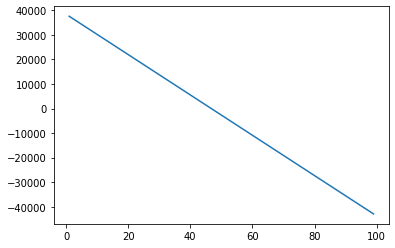

In [46]:
plt.plot(new_input, Yhat2)
plt.show()